In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import glob
import os
import matplotlib.cm as cm
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import os
import powerlaw
import sys

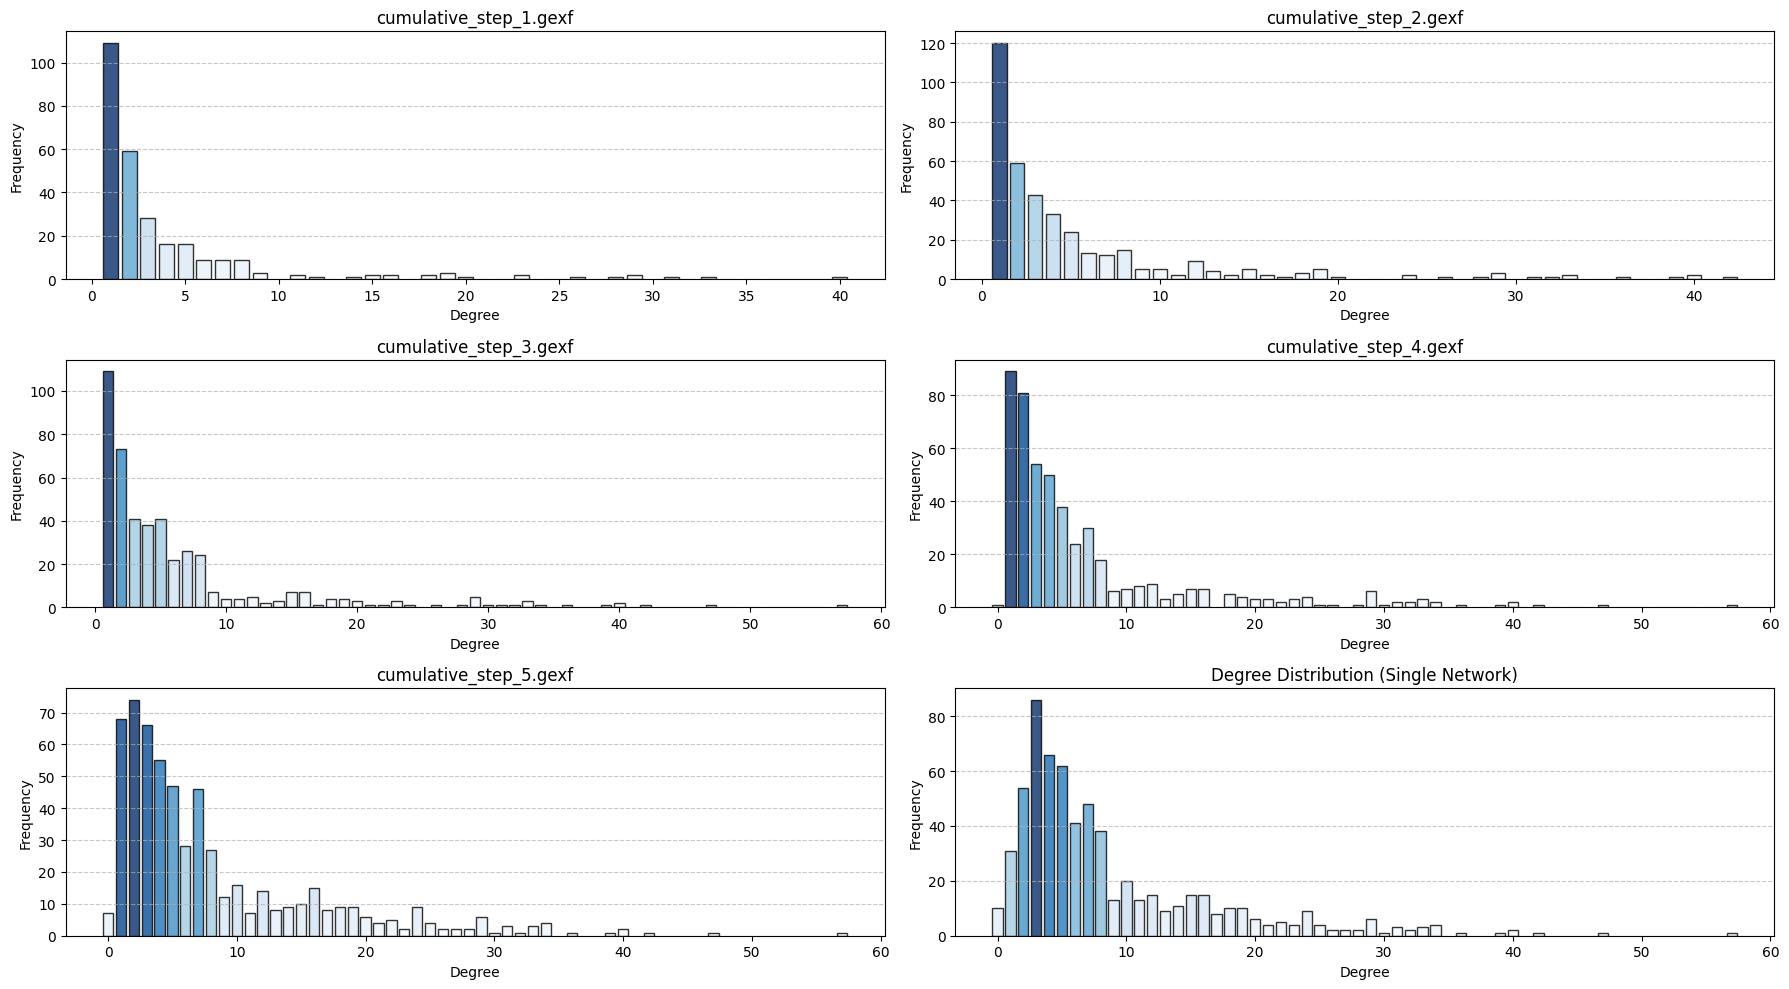

In [6]:
# File paths for cumulative networks
folder_path = '../networks/one_piece_cumulative/'
file_names = [
    'cumulative_step_1.gexf',
    'cumulative_step_2.gexf',
    'cumulative_step_3.gexf',
    'cumulative_step_4.gexf',
    'cumulative_step_5.gexf'
]
file_paths = [os.path.join(folder_path, file_name) for file_name in file_names]

# Single network file
single_file_path = '../networks/One_Piece.gexf'  # Replace with actual path

# Create a 2x3 grid layout for plots
fig, axes = plt.subplots(3, 2, figsize=(18, 10))
axes = axes.flatten()

# Process the cumulative networks
for ax, file_path in zip(axes[:5], file_paths):
    try:
        # Load the network
        G = nx.read_gexf(file_path)
        
        # Compute degree distribution
        degrees = [d for n, d in G.degree()]
        unique_degrees, counts = np.unique(degrees, return_counts=True)
        
        # Create color mapping
        norm = Normalize(vmin=min(counts), vmax=max(counts))
        cmap = plt.cm.Blues
        colors = [cmap(norm(count)) for count in counts]
        
        # Plot the degree distribution
        bars = ax.bar(unique_degrees, counts, color=colors, edgecolor='black', alpha=0.8)
        ax.set_title(os.path.basename(file_path))
        ax.set_xlabel("Degree")
        ax.set_ylabel("Frequency")
        ax.grid(axis='y', linestyle='--', alpha=0.7)
    except Exception as e:
        ax.set_title(f"Error: {os.path.basename(file_path)}")
        ax.text(0.5, 0.5, str(e), ha='center', va='center', fontsize=10)
        ax.axis('off')

# Process the single network file
try:
    G_single = nx.read_gexf(single_file_path)
    degrees = [d for n, d in G_single.degree()]
    unique_degrees, counts = np.unique(degrees, return_counts=True)
    
    # Create color mapping
    norm = Normalize(vmin=min(counts), vmax=max(counts))
    cmap = plt.cm.Blues
    colors = [cmap(norm(count)) for count in counts]
    
    # Plot the degree distribution for the single network
    ax = axes[5]
    bars = ax.bar(unique_degrees, counts, color=colors, edgecolor='black', alpha=0.8)
    ax.set_title("Degree Distribution (Single Network)")
    ax.set_xlabel("Degree")
    ax.set_ylabel("Frequency")
    ax.grid(axis='y', linestyle='--', alpha=0.7)
except Exception as e:
    ax = axes[5]
    ax.set_title("Error: Single Network")
    ax.text(0.5, 0.5, str(e), ha='center', va='center', fontsize=10)
    ax.axis('off')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


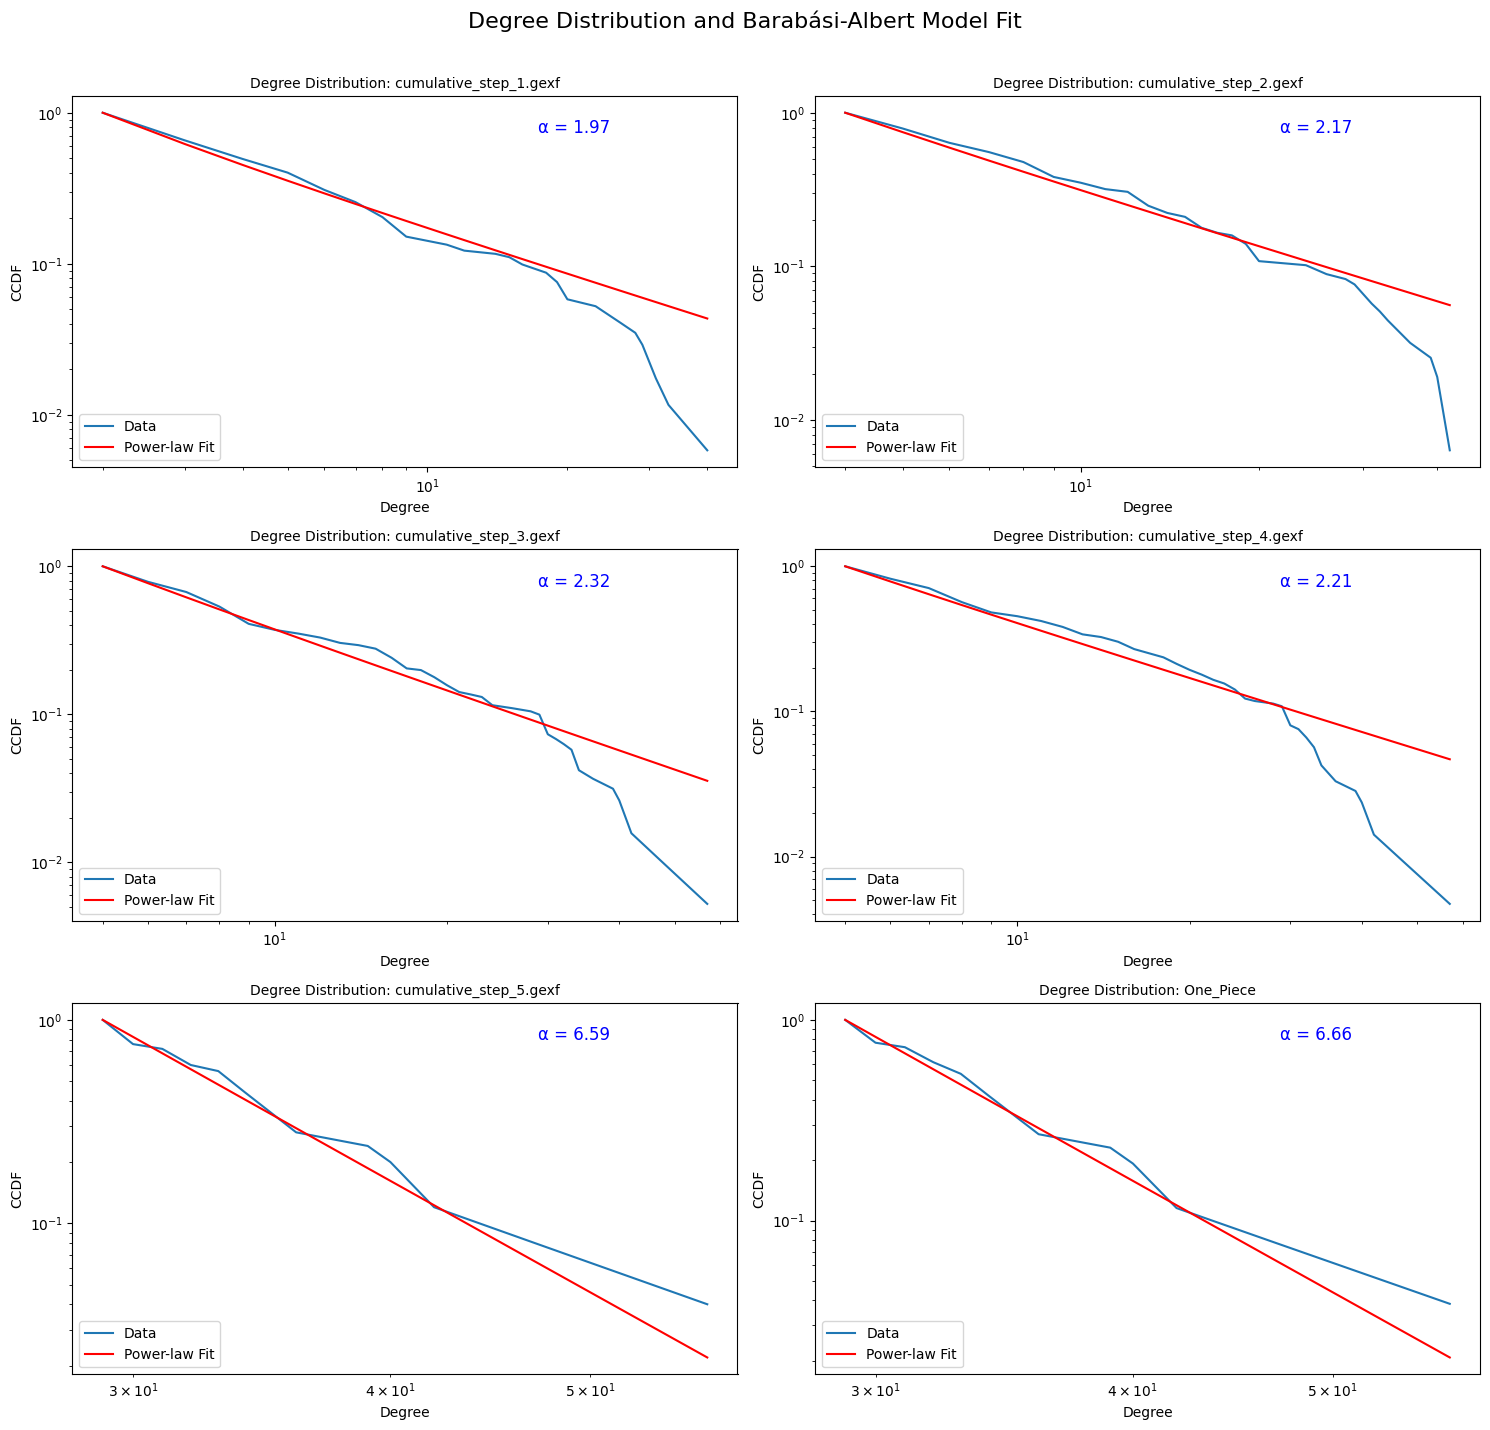

In [7]:
# Prepare for subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

def fit_and_plot(graph, graph_name, ax):
    degrees = [d for n, d in graph.degree()]
    with open(os.devnull, 'w') as fnull:
        sys.stdout = fnull
        results = powerlaw.Fit(degrees, discrete=True)
        sys.stdout = sys.__stdout__
    alpha = results.power_law.alpha
    results.plot_ccdf(label='Data', ax=ax)
    results.power_law.plot_ccdf(label='Power-law Fit', color='r', ax=ax)
    ax.legend()
    ax.set_title(f"Degree Distribution: {graph_name}", fontsize=10)
    ax.set_xlabel("Degree")
    ax.set_ylabel("CCDF")
    ax.annotate(f'α = {alpha:.2f}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12, color='blue')

for i, (file_path, file_name) in enumerate(zip(file_paths + [single_file_path], file_names + ["One_Piece"])):
    if os.path.exists(file_path):
        graph = nx.read_gexf(file_path)
        fit_and_plot(graph, file_name, axes[i])

# Add a global title
plt.suptitle("Degree Distribution and Barabási-Albert Model Fit", fontsize=16, y=0.95)

# Adjust layout and show
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()
